In [1]:
from math import *
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import norm, ks_2samp
import scipy.stats as stats  
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'legend.labelspacing':0.25, 'legend.fontsize': 12})
mpl.rcParams.update({'errorbar.capsize': 4})

f = open ('clean_NSPSRlist.txt','r')

name_psr = []
snr_name = []
flag     = []
B        = []
log10B   = []
P        = []
dotP     = []
P0       = []
age_SNR  = []
tau      = []
B_psr    = []
log10B_psr = []

for lines in f.readlines():
    line = lines.split('\t')
    name_psr.append (line[0])
    snr_name.append (line[1])
    flag.append (line[2])
    B.append (float(line[3]))
    log10B.append (log10(B[-1]))
    P.append (float(line[4]))
    dotP.append (float(line[5]))
    P0.append (float(line[6]))
    age_SNR.append (float(line[7]))
    tau.append (float(line[8]))
#    if flag[-1] == 'PSR':
#        B_psr.append (float())

log10B_psr  = [log10B[i] for i in range (0, len(flag)) if flag[i] == 'PSR']
P0_psr      = [P0[i] for i in range (0, len(P0)) if flag[i] == 'PSR']
P0_psr_sel  = [P0[i] for i in range (0, len(P0)) if flag[i] == 'PSR' and P0[i] > 0.01 and P0[i] < 2] 
age_SNR_psr = [age_SNR[i] for i in range (0, len(age_SNR)) if flag[i] == 'PSR']

print ('Number of all NSs: ', len(log10B))
print ('Number of PSR: ', len(P0_psr))
print ('Number of PSR in period selected sample: ', len(P0_psr_sel))
## Briefly examine the data to check if they look reasonable 
for i in range (0,5):
    print (name_psr[i], snr_name[i], flag[i], P[i], dotP[i])


Bad key "text.kerning_factor" on line 4 in
/Users/ignotur/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


Number of all NSs:  56
Number of PSR:  45
Number of PSR in period selected sample:  35
AXP 1E 1841-045 G027.4+00.0 AXP 11.788978 4.09e-11
AXP 1E 2259+586 G109.1-01.0 AXP 6.979042725 4.84e-13
AXS J1617-5055  G332.4-00.4 PSR 0.069356847 1.35e-13
CXOU J171405.7-381031 G348.7+00.3 AXP 3.825352 6.4e-11
J0002+6216 G116.9+00.2 PSR 0.1153635683 5.97e-15


In [2]:
def test_normality (data):

    stat, p = shapiro(np.asarray(data))

    print('Statistics=%.3f, p=%.7f' % (stat, p))
    # interpret
    alpha = 0.03
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


# P-dot P diagram

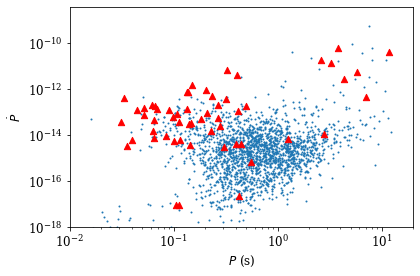

In [3]:
g_atnf = open ('atnf_pdotp.txt', 'r')

p_atnf = []
dotp_atnf = []


for lines in g_atnf.readlines():

    line = lines.split()

    p_atnf.append    (float(line[2]))
    dotp_atnf.append (float(line[3]))


plt.scatter (p_atnf, dotp_atnf, s=1)
plt.scatter (P, dotP, marker='^', color='red', s=40)
plt.xlabel(r'$P$ (s)')
plt.ylabel(r'$\dot P$')
plt.xlim([0.01, 20])
plt.ylim([1e-18, 4e-9])
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('pdotp_diag.pdf')
plt.show()


# Analysis of current magnetic fields

Number of objects included in the analysis:  56


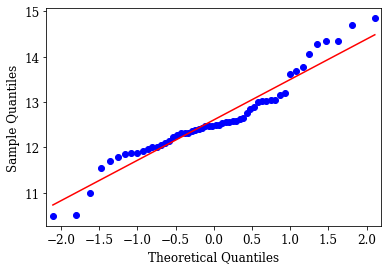

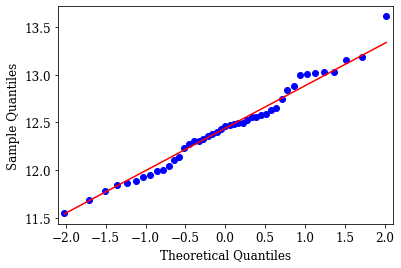

All NS,  parameters of log-normal distribution: mu =  12.603163343271875  sigma =  0.8909746487233884
All PSR, parameters of log-normal distribution: mu =  12.439410762089038  sigma =  0.44484067751292633


In [4]:
print ('Number of objects included in the analysis: ', len(log10B))
qqplot(np.asarray(log10B), line='s')
plt.savefig('qq_logB_all.pdf')
plt.show()

qqplot(np.asarray(log10B_psr), line='s')
plt.savefig('qq_logB_psr.pdf')
plt.show()

mean_v  = np.mean (log10B)
sigma_v = np.std(log10B)

mean_psr = np.mean (log10B_psr)
sigma_psr = np.std(log10B_psr)

print ('All NS,  parameters of log-normal distribution: mu = ', mean_v, ' sigma = ', sigma_v)
print ('All PSR, parameters of log-normal distribution: mu = ', mean_psr, ' sigma = ', sigma_psr)

56


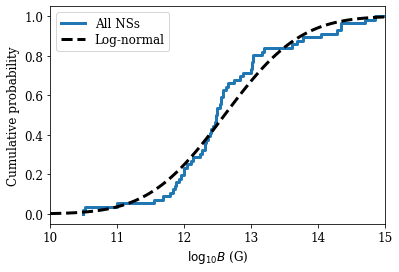

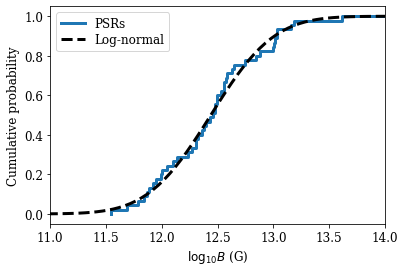

56


In [5]:
x = np.linspace (10, 15, 100)

print (len(log10B))

log10B.append (17)      ## This is done to make the histogram look appropriately
log10B_psr.append (17)  ## This is done to make the histogram look appropriately


plt.step (np.sort (log10B), np.linspace(0,1, len(log10B)), where='pre', label='All NSs', linewidth=3)
plt.plot (x, norm.cdf(x, loc = mean_v, scale=sigma_v), 'k--', label='Log-normal', linewidth=3)
plt.xlabel(r'$\log_{10} B$ (G)')
plt.ylabel('Cumulative probability')
plt.legend(loc='upper left')
plt.xlim([10,15])
plt.savefig ('logB_distr_all.pdf')
plt.show()


plt.step (np.sort (log10B_psr), np.linspace(0,1, len(log10B_psr)), where='pre', label='PSRs', linewidth=3)
plt.plot (x, norm.cdf(x, loc = mean_psr, scale=sigma_psr), 'k--', label='Log-normal', linewidth=3)
plt.xlabel(r'$\log_{10} B$ (G)')
plt.ylabel('Cumulative probability')
plt.legend(loc='upper left')
plt.xlim([11,14])
plt.savefig ('logB_distr_psr.pdf')
plt.show()

del log10B[-1]      ## remove this element so it does not affect any calculations of statistics
del log10B_psr[-1]
print (len(log10B))

In [6]:
test_normality (log10B)

Statistics=0.946, p=0.0143920
Sample does not look Gaussian (reject H0)


In [7]:
test_normality (log10B_psr)

Statistics=0.983, p=0.7272420
Sample looks Gaussian (fail to reject H0)


# Analysis of initial periods

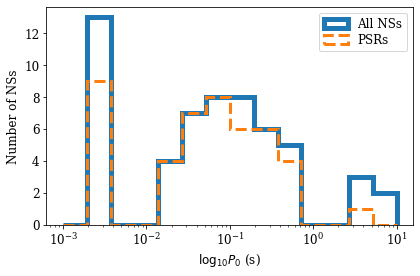

In [8]:
## First have a look at log-binned data

plt.hist(P0,     bins=np.logspace(np.log10(0.001),np.log10(10.0), 15), histtype='step', linewidth=5, label='All NSs')
plt.hist(P0_psr, bins=np.logspace(np.log10(0.001),np.log10(10.0), 15), histtype='step', linewidth=3, label='PSRs', linestyle='dashed')
plt.xscale('log')
plt.xlabel(r'$\log_{10} P_0$ (s)')
plt.legend()
plt.ylabel('Number of NSs')
plt.tight_layout()
plt.savefig('p0_hist.pdf')
plt.show()

In [9]:
## Simple analysis of periods

log10P0     = np.log10(P0)
log10P0_psr = np.log10(P0_psr) 
log10P0_sel = np.log10(P0_psr_sel)

mean_all_p  = np.mean (log10P0)
sigma_all_p = np.std(log10P0)

mean_psr = np.mean (log10P0_psr)
sigma_psr = np.std(log10P0_psr)

mean_sel = np.mean (log10P0_sel)
sigma_sel = np.std(log10P0_sel)

print ('All NS,  parameters of log-normal distribution for initial periods: mu = ', mean_all_p, ' sigma = ', sigma_all_p)
print ('All PSR, parameters of log-normal distribution for initial periods: mu = ', mean_psr, ' sigma = ', sigma_psr)
print ('Selected PSR, parameters of log-normal distribution for initial periods: mu = ', mean_sel, ' sigma = ', sigma_sel)

test_normality (log10P0)
test_normality (log10P0_psr)
test_normality (log10P0_sel)

All NS,  parameters of log-normal distribution for initial periods: mu =  -1.2517411362319635  sigma =  0.9937631908358192
All PSR, parameters of log-normal distribution for initial periods: mu =  -1.3353060258002478  sigma =  0.8055885234477274
Selected PSR, parameters of log-normal distribution for initial periods: mu =  -1.0354034849230451  sigma =  0.41966177089464657
Statistics=0.922, p=0.0014525
Sample does not look Gaussian (reject H0)
Statistics=0.910, p=0.0019215
Sample does not look Gaussian (reject H0)
Statistics=0.970, p=0.4529895
Sample looks Gaussian (fail to reject H0)


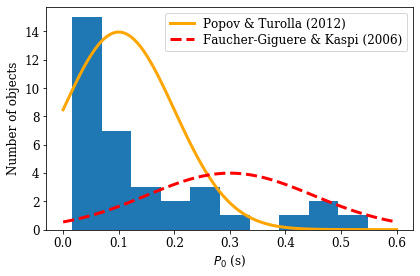

0.1439772905909299
0.13799734806384564
Statistics=0.811, p=0.0000330
Sample does not look Gaussian (reject H0)


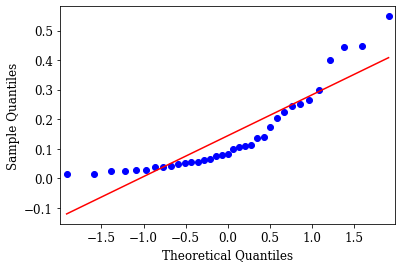

In [10]:
## Test if normal distribution is a good model for computed initial periods of selected radio pulsars

xv = np.linspace (0.0, 0.6, 100)

yv  = norm.pdf (xv, loc = 0.1, scale = 0.1) * 3.5  ## Popov & Turolla (2012)
yv1 = norm.pdf (xv, loc = 0.3, scale = 0.15) * 1.5 ## Faucher-Giguere & Kaspi (2006)

plt.hist(P0_psr_sel)
plt.plot (xv,yv, '-', color='orange', linewidth = 3, label='Popov & Turolla (2012)')
plt.plot (xv,yv1,'--', color='red', linewidth = 3, label='Faucher-Giguere & Kaspi (2006)')
plt.xlabel(r'$P_0$ (s)')
plt.ylabel('Number of objects')
plt.tight_layout()
plt.legend()
plt.savefig('P0_hist_selected.pdf')
plt.show()

print (np.mean(P0_psr_sel))
print (np.std (P0_psr_sel))

test_normality (P0_psr_sel)

qqplot(np.asarray(P0_psr_sel), line='s')
plt.savefig('qq_P0_selection.pdf')
plt.show()

35


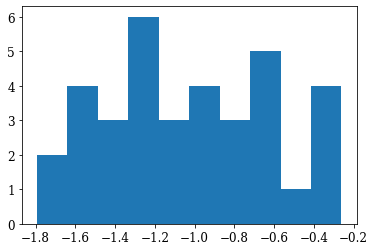

-1.0354034849230451
0.41966177089464657
Statistics=0.970, p=0.4529895
Sample looks Gaussian (fail to reject H0)


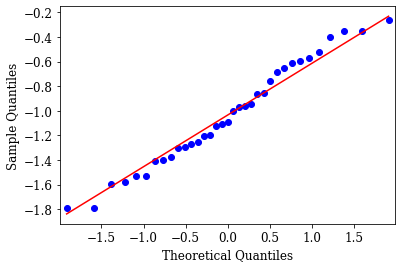

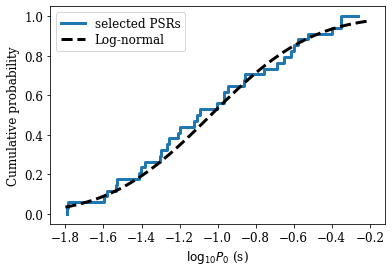

In [11]:
## Test if log-normal distribution is a good model for computed initial periods of selected radio pulsars
print(len(P0_psr_sel))
logP0_sel = np.log10(P0_psr_sel)

plt.hist(logP0_sel)
plt.show()

print (np.mean(logP0_sel))
print (np.std (logP0_sel))

mean_psr_P0  = np.mean(logP0_sel)
sigma_psr_P0 = np.std (logP0_sel)

x = np.linspace (-1.8, -0.2, 100)

test_normality (logP0_sel)

qqplot(np.asarray(logP0_sel), line='s')
plt.savefig('qq_log10P0_selection.pdf')
plt.show()


plt.step (np.sort (logP0_sel), np.linspace(0,1, len(logP0_sel)), where='pre', label='selected PSRs', linewidth=3)
plt.plot (x, norm.cdf(x, loc = mean_psr_P0, scale=sigma_psr_P0), 'k--', label='Log-normal', linewidth=3)
plt.xlabel(r'$\log_{10} P_0$ (s)')
plt.ylabel('Cumulative probability')
plt.legend(loc='upper left')
#plt.xlim([11,14])
plt.savefig ('logP0_distr_psr_selected.pdf')
plt.show()


# Fraction of very short initial periods

In [14]:
P0 = np.random.normal    (-1.04, 0.53, size=100000) ## -0.96, 0.43
P0 = np.power (10.0, P0)

In [15]:
P0_less_5ms =  [P0[i] for i in range (0, len(P0)) if P0[i] < 0.005]

In [16]:
print (len(P0_less_5ms) / len(P0))

0.00864
